<a href="https://colab.research.google.com/github/sadizobaer/paragraph-genaration-using-bi-directional-LSTM/blob/master/researchpara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
#will test the gpu of colab
import tensorflow as tf
print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name!= '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found : {}'.format(device_name))

2.2.0
Found : /device:GPU:0


In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Datasheet complete.xlsx",encoding='utf-8')

In [ ]:
df.columns = ['title','paragraph']

In [ ]:
#will print normal data as given 

for i in range(len(df.head())):
    print("Number:",i+1)
    print("Title:",df.title[i])
    print()
    print("Paragraph:",df.paragraph[i])
    print()
    print()

Number: 1
Title: নিজামী

Paragraph: রায়ে মতিউর রহমান নিজামীকে দোষী সাব্যস্ত করতে তৎকালীন শিল্পসচিব শোয়েব আহমদ ও বাংলাদেশ রসায়ন শিল্প সংস্থার (বিসিআইসি) চেয়ারম্যান মেজর জেনারেল (অব.) ইমামুজ্জামানের বক্তব্য আমলে নিয়েছেন আদালত। শিল্পমন্ত্রী হিসেবে সিইউএফএল জেটিঘাট নিজামীর অধীন স্থাপনা ছিল এবং এটা ছিল বিশেষ নিরাপত্তা স্থাপনা। সেখানে অস্ত্র খালাস ও আটকের বিষয়ে নিজামীকে জানিয়েছিলেন এই দুজন শীর্ষস্থানীয় কর্মকর্তা। তাঁরা আদালতকে বলেছেন, তখন নিজামী তাঁদের বলেছিলেন, ‘আমি বিষয়টা শুনেছি। এটা আইনশৃঙ্খলা বাহিনী দেখছে। দেশের হাইয়েস্ট অথরিটিও (সর্বোচ্চ কর্তৃপক্ষ) এ বিষয়ে অবগত আছেন। স্বরাষ্ট্র মন্ত্রণালয় এ ব্যাপারে পদক্ষেপ নিচ্ছে। কাজেই আমাদের কোনো কিছু করার প্রয়োজন নেই।’ আসামি ও সাক্ষীদের বক্তব্যের উদ্ধৃতি দিয়ে বলা হয়, বিশাল চালানের অস্ত্র ও গোলাবারুদ নিরাপদে সিইউএফএল জেটিঘাটে খালাসের জন্য তৎকালীন ভারপ্রাপ্ত শিল্পসচিব নুরুল আমিনকে সিইউএফএল রেস্টহাউসে পাঠিয়েছিলেন তখনকার শিল্পমন্ত্রী নিজামী। এসব বিবেচনায় নিয়ে আদালত তাঁকে দোষী সাব্যস্ত করেন।


Number: 2
Title: বাবর

Paragraph: লুৎফুজ্জামান বাবরের সম্পৃক্

In [ ]:
contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [ ]:
import re
import string
def clean_text(text,remove_stopwords = False):
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a\u200c\u200b]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
    text = re.sub(bangla_digits, " ", text)
    text = re.sub(punc, " ", text)
    text = re.sub(english_chars, " ", text)
    text = re.sub(bangla_fullstop, " ", text)
    text = re.sub(punctSeq, " ", text)
    text = whitespace.sub(" ", text).strip()
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;‘:‘ ’', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r"[\@$#%~+-\.\'।\"]"," ",text)
    text = re.sub(r"(?m)^\s+", "", text)
    text = re.sub("[()]","",text)
    text = re.sub("[‘’]","",text)
    text = re.sub("[!]","",text)
    text = re.sub("[/]","",text)
    text = re.sub("[:]","",text)
    text= re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',text)
    text= text.strip("/")

    if remove_stopwords:
        k = []
        with open('gdrive/My Drive/Colab Notebooks/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            text = [t for t in text if t not in k]
            text = "".join(text)
        
    return text

In [ ]:
clean_paragraph = []
for paragraph in df.paragraph:
    clean_paragraph.append(clean_text(paragraph,remove_stopwords = False))
print("paragraph are complete.")

clean_title = []
for title in df.title:
    clean_title.append(clean_text(title))
print("title are complete.")

new_df = pd.DataFrame({'title': clean_title, 'paragraph' : clean_paragraph})
df.update(new_df)

paragraph are complete.
title are complete.


In [ ]:
#will print clean data

for i in range(len(df.head())):
    print("Paragraph:",i+1)
    print("Title:",df.title[i])
    print()
    print("Paragraph:",df.paragraph[i])
    print()
    print()

Paragraph: 1
Title: নিজামী

Paragraph: রায়ে মতিউর রহমান নিজামীকে দোষী সাব্যস্ত করতে তৎকালীন শিল্পসচিব শোয়েব আহমদ ও বাংলাদেশ রসায়ন শিল্প সংস্থার বিসিআইসি চেয়ারম্যান মেজর জেনারেল অব ইমামুজ্জামানের বক্তব্য আমলে নিয়েছেন আদালত শিল্পমন্ত্রী হিসেবে সিইউএফএল জেটিঘাট নিজামীর অধীন স্থাপনা ছিল এবং এটা ছিল বিশেষ নিরাপত্তা স্থাপনা সেখানে অস্ত্র খালাস ও আটকের বিষয়ে নিজামীকে জানিয়েছিলেন এই দুজন শীর্ষস্থানীয় কর্মকর্তা তাঁরা আদালতকে বলেছেন তখন নিজামী তাঁদের বলেছিলেন আমি বিষয়টা শুনেছি এটা আইনশৃঙ্খলা বাহিনী দেখছে দেশের হাইয়েস্ট অথরিটিও সর্বোচ্চ কর্তৃপক্ষ এ বিষয়ে অবগত আছেন স্বরাষ্ট্র মন্ত্রণালয় এ ব্যাপারে পদক্ষেপ নিচ্ছে কাজেই আমাদের কোনো কিছু করার প্রয়োজন নেই আসামি ও সাক্ষীদের বক্তব্যের উদ্ধৃতি দিয়ে বলা হয় বিশাল চালানের অস্ত্র ও গোলাবারুদ নিরাপদে সিইউএফএল জেটিঘাটে খালাসের জন্য তৎকালীন ভারপ্রাপ্ত শিল্পসচিব নুরুল আমিনকে সিইউএফএল রেস্টহাউসে পাঠিয়েছিলেন তখনকার শিল্পমন্ত্রী নিজামী এসব বিবেচনায় নিয়ে আদালত তাঁকে দোষী সাব্যস্ত করেন


Paragraph: 2
Title: বাবর

Paragraph: লুৎফুজ্জামান বাবরের সম্পৃক্ততার তথ্য আদালতে

In [ ]:
total = clean_paragraph+clean_title
total

['রায়ে মতিউর রহমান নিজামীকে দোষী সাব্যস্ত করতে তৎকালীন শিল্পসচিব শোয়েব আহমদ ও বাংলাদেশ রসায়ন শিল্প সংস্থার বিসিআইসি চেয়ারম্যান মেজর জেনারেল অব ইমামুজ্জামানের বক্তব্য আমলে নিয়েছেন আদালত শিল্পমন্ত্রী হিসেবে সিইউএফএল জেটিঘাট নিজামীর অধীন স্থাপনা ছিল এবং এটা ছিল বিশেষ নিরাপত্তা স্থাপনা সেখানে অস্ত্র খালাস ও আটকের বিষয়ে নিজামীকে জানিয়েছিলেন এই দুজন শীর্ষস্থানীয় কর্মকর্তা তাঁরা আদালতকে বলেছেন তখন নিজামী তাঁদের বলেছিলেন আমি বিষয়টা শুনেছি এটা আইনশৃঙ্খলা বাহিনী দেখছে দেশের হাইয়েস্ট অথরিটিও সর্বোচ্চ কর্তৃপক্ষ এ বিষয়ে অবগত আছেন স্বরাষ্ট্র মন্ত্রণালয় এ ব্যাপারে পদক্ষেপ নিচ্ছে কাজেই আমাদের কোনো কিছু করার প্রয়োজন নেই আসামি ও সাক্ষীদের বক্তব্যের উদ্ধৃতি দিয়ে বলা হয় বিশাল চালানের অস্ত্র ও গোলাবারুদ নিরাপদে সিইউএফএল জেটিঘাটে খালাসের জন্য তৎকালীন ভারপ্রাপ্ত শিল্পসচিব নুরুল আমিনকে সিইউএফএল রেস্টহাউসে পাঠিয়েছিলেন তখনকার শিল্পমন্ত্রী নিজামী এসব বিবেচনায় নিয়ে আদালত তাঁকে দোষী সাব্যস্ত করেন',
 'লুৎফুজ্জামান বাবরের সম্পৃক্ততার তথ্য আদালতে বর্ণনা করেন জন সাক্ষী ও আসামি আদালত ডিজিএফআইয়ের সাবেক মহাপরিচালক মেজর জ

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Flatten, Bidirectional, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.models import Model
from keras.models import model_from_json
import keras.utils as ku 
import keras
import tensorflow as tf
from numpy.random import seed
tf.random.set_seed(3)
seed(1)

import pandas as pd
import numpy as np
import string, os 
import collections
import random

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

Using TensorFlow backend.


In [ ]:
embeddings_index = dict()
with open('/content/drive/My Drive/Colab Notebooks/bn_w2v_model.text', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype = 'float32')
        embeddings_index[word] = vector
    

In [ ]:
embedding_size = len(embeddings_index['ঝুঁকির'])
embedding_size

300

In [ ]:
def mapToFlattenList(token_list):
    flatten_list = []
    for token in token_list:
        if token in embeddings_index:
            flatten_list += list(embeddings_index[token])
        else:
            flatten_list += [0] * embedding_size
    return flatten_list

In [ ]:
max_n_gram = 10
tokenizer = Tokenizer()
def get_sequence_of_tokens(corpus):
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    input_sequences = []
    for line in corpus:
        token_list = text_to_word_sequence(line)
        for i in range(1, len(token_list)):
            n_gram_sequence = mapToFlattenList(token_list[max(i-max_n_gram,0):i])
            input_sequences.append(n_gram_sequence+tokenizer.texts_to_sequences([token_list[i]])[0])
    return input_sequences, total_words

In [ ]:
inp_sequences, total_words = get_sequence_of_tokens(total)

In [ ]:
inp_sequences[:5]

[[-0.084877,
  -0.274159,
  0.284494,
  -0.015136,
  -0.171515,
  0.199631,
  -0.027436,
  -0.314378,
  -0.048818,
  0.000483,
  -0.379443,
  0.181708,
  0.143347,
  0.242601,
  0.301789,
  0.430291,
  0.206581,
  -0.032181,
  0.512098,
  -0.20681,
  -0.188433,
  0.062627,
  0.173055,
  -0.247447,
  -0.089314,
  0.150171,
  -0.108916,
  0.295458,
  0.211873,
  -0.050246,
  -0.415262,
  -0.186712,
  -0.227485,
  0.08086,
  0.000602,
  0.221173,
  0.085995,
  -0.132318,
  -0.205905,
  -0.034592,
  -0.268289,
  0.30173,
  -0.11192,
  0.120121,
  -0.0925,
  0.189351,
  -0.2033,
  -0.199051,
  -0.108674,
  0.058545,
  -0.120461,
  0.463502,
  -0.060254,
  -0.094812,
  -0.106089,
  -0.063467,
  -0.212498,
  0.505114,
  -0.016732,
  -0.250641,
  0.220402,
  -0.066945,
  -0.144993,
  0.179795,
  0.034467,
  -0.040299,
  -0.005292,
  -0.02122,
  -0.184057,
  0.127802,
  -0.117895,
  0.404913,
  -0.16715,
  -0.120921,
  -0.363581,
  0.041385,
  -0.125079,
  -0.133716,
  0.120339,
  0.272993,
  0

In [ ]:
def generate_padded_sequences(input_sequences):
    n = len(input_sequences)
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre',dtype='float'))
    predictors, label = input_sequences[:,:-1].reshape((n, -1 ,embedding_size)),input_sequences[:,-1:]
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [ ]:
predictors.shape, label.shape

((142725, 10, 300), (142725, 1))

In [ ]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()

    model.add(Bidirectional(LSTM(units=512), input_shape=predictors[0].shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.5))
    
    model.add((Dense(total_words)))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    
    model.compile(loss='sparse_categorical_crossentropy' , optimizer=tf.keras.optimizers.Adam(lr=0.001) , metrics=['accuracy']) 
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1024)              3330048   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 21297)             21829425  
_________________________________________________________________
batch_normalization_2 (Batch (None, 21297)             85188     
_________________________________________________________________
activation_2 (Activation)    (None, 21297)            

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=2,batch_size=100)

Epoch 1/100
 - 56s - loss: 8.5769 - accuracy: 0.0481
Epoch 2/100
 - 53s - loss: 7.0925 - accuracy: 0.0910
Epoch 3/100
 - 53s - loss: 6.3099 - accuracy: 0.1124
Epoch 4/100
 - 53s - loss: 5.7796 - accuracy: 0.1348
Epoch 5/100
 - 53s - loss: 5.3653 - accuracy: 0.1562
Epoch 6/100
 - 53s - loss: 5.0072 - accuracy: 0.1819
Epoch 7/100
 - 52s - loss: 4.6924 - accuracy: 0.2099
Epoch 8/100
 - 52s - loss: 4.4084 - accuracy: 0.2360
Epoch 9/100
 - 52s - loss: 4.1467 - accuracy: 0.2639
Epoch 10/100
 - 53s - loss: 3.9031 - accuracy: 0.2929
Epoch 11/100
 - 54s - loss: 3.6692 - accuracy: 0.3243
Epoch 12/100
 - 53s - loss: 3.4551 - accuracy: 0.3538
Epoch 13/100
 - 52s - loss: 3.2531 - accuracy: 0.3861
Epoch 14/100
 - 52s - loss: 3.0521 - accuracy: 0.4202
Epoch 15/100
 - 52s - loss: 2.8640 - accuracy: 0.4509
Epoch 16/100
 - 52s - loss: 2.6878 - accuracy: 0.4838
Epoch 17/100
 - 53s - loss: 2.5246 - accuracy: 0.5129
Epoch 18/100
 - 53s - loss: 2.3672 - accuracy: 0.5443
Epoch 19/100
 - 53s - loss: 2.2149 - 

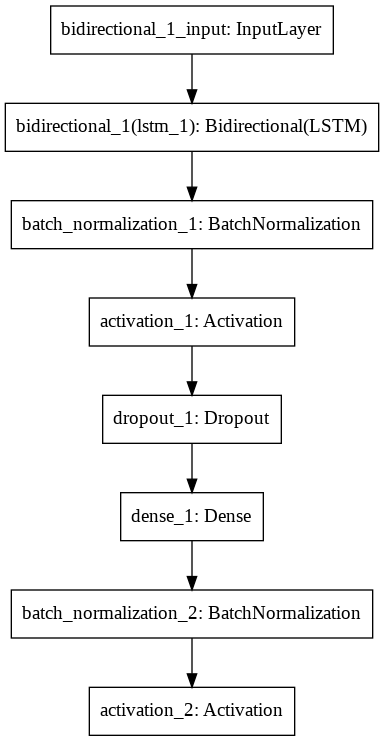

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/Colab Notebooks/pngwave.png')

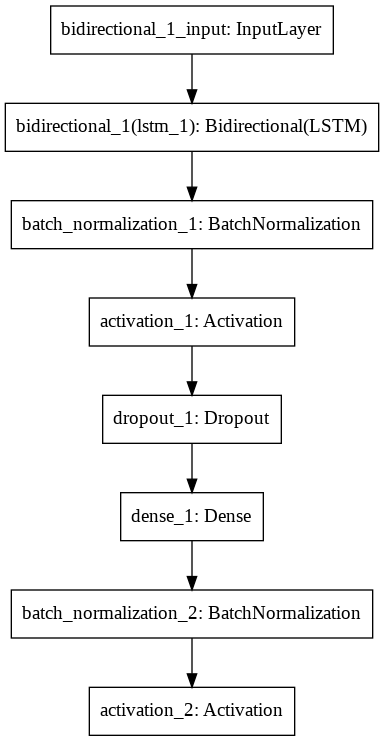

In [ ]:
from IPython.display import display, Image
display(Image(filename='/content/drive/My Drive/Colab Notebooks/pngwave.png'))

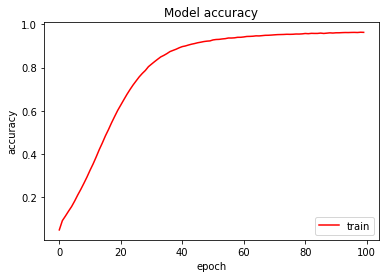

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

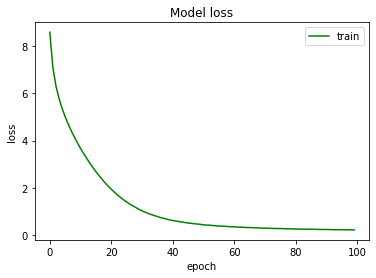

In [ ]:
plt.plot(history.history['loss'],color = 'green')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
 def generate_paragraph(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = text_to_word_sequence(seed_text)
        n_gram_sequence = mapToFlattenList(token_list[max(len(token_list)-max_n_gram,0):])
        input_sequences = np.array(pad_sequences([n_gram_sequence], maxlen=max_sequence_len-1, padding='pre',dtype='float'))
        predictor = input_sequences.reshape((1, -1 ,embedding_size))
        predicted = model.predict_classes(predictor, verbose=0)
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [ ]:
generate_paragraph("ঝুঁকির মধ্যে দেশ", 200, model, max_sequence_len)

'ঝুঁকির মধ্যে দেশ থেকে সরে আসা ভুল ছিল বলে মনে হচ্ছে না৷ ভিসা জালিয়াতি এবং গৃহপরিচারিকার বেতন নিয়ে ভুয়া তথ্য দেওয়ার অভিযোগে দেবযানীর বিরুদ্ধে নিউইয়র্কে মামলা রয়েছে৷ তিনি কূটনৈতিক দায়মুক্তির সুবিধা কাজে লাগিয়ে ওই অভিযোগ থেকে অব্যাহতি পেতে অাইনি লড়াই চালিয়ে যাচ্ছেন৷ মার্কিন পররাষ্ট্র দপ্তর গত সপ্তাহে বলেছে দেবযানীকে গ্রেপ্তার ও পরবর্তী পদক্ষেপ সম্পর্কে মার্কিন অাইনশৃঙ্খলা রক্ষাকারী বাহিনীর ভূমিকা সঠিক ছিল৷ পররাষ্ট্র দপ্তরের এই সমর্থনের ফলে দেবযানীর বিরুদ্ধে মামলার কার্যক্রম অব্যাহত রাখতে মার্কিন কৌঁসুলি প্রীত ভারারার কোনো অাইনি বাধা থাকছে না৷ ফলে দায়মুক্তি সুবিধার অাওতায় দেবযানীর বিরুদ্ধে অভিযোগ প্রত্যাহারের সম্ভাবনা নেই৷ এ ব্যাপারে ভারারা ইতিমধ্যে দেবযানীর বিরুদ্ধে প্রয়োজনীয় অাটটি দলিলপত্র অাদালতে পেশ করেছেন৷ এর অাগে দেবযানীর অাইনজীবী ড্যানিয়েল অারশাক গত জানুয়ারি তাঁর মক্কেলের বিরুদ্ধে েগ্রপ্তারি পরোয়ানা প্রত্যাহার করে তাঁকে দেশে ফেরত পাঠানোর অনুমতি প্রার্থনা করেন৷ তিনি গত শুক্রবার বলেন মার্কিন কৌঁসুলি অাসল ঘটনা এবং অাইনের ব্যত্যয় ঘটাচ্ছেন৷ বিষয়টি নিয়ে অাদালতই চূড়ান্ত সিদ্ধান্

In [ ]:
generate_paragraph("রাজধানী", 200, model, max_sequence_len)

'রাজধানী ঢাকাকে আবারও সারা দেশ থেকে বিচ্ছিন্ন করল সরকার গত রোববার থেকে টানা দুই দিন সড়কপথ রেলপথ ও নৌপথে ঢাকামুখী যাত্রা ঠেকিয়ে রাখার কারণে একধরনের সরকারি অবরোধ অবস্থা তৈরি হয়েছে এর ফলে সারা দেশের যোগাযোগব্যবস্থা প্রায় অচল হয়ে পড়ে এ অবস্থায় আজ থেকে সারা দেশে অনির্দিষ্টকালের সড়কপথ রেলপথ ও নৌপথে অবরোধ কর্মসূচি ডেকেছে বিরোধী জোট বিএনপির নেতৃত্বাধীন দলীয় জোটের নেতা কর্মীরা সমাবেশ করতে চাইলে এবং পুলিশ ও সরকার সমর্থকেরা তা প্রতিহত করায় ঢাকাসহ সারা দেশে সংঘাতের ঘটনা ঘটে সংঘর্ষে নাটোর চাঁপাইনবাবগঞ্জ ও রাজশাহীতে চারজন নিহত হয়েছেন সারা দেশে আহত হয়েছেন জন নিহত ব্যক্তিরা সবাই বিএনপির নেতা কর্মী রাতে বিএনপির পাঠানো সংবাদ বিজ্ঞপ্তিতে বলা হয় গতকালের সংঘর্ষে তাদের তিনজন নিহত ও জন আহত হয়েছেন গ্রেপ্তার হয়েছেন প্রায় তবে স্থানীয় বিএনপি চারজন নিহত হওয়ার কথা জানিয়েছে ঢাকা মহানগর পুলিশ ডিএমপি জানিয়েছে গত রবি ও সোমবার রাজধানী থেকে জনকে পুলিশ গ্রেপ্তার করেছে এঁদের মধ্যে পাঁচজনকে ভ্রাম্যমাণ আদালত এক বছর করে কারাদণ্ড দেন বিএনপির নেতৃত্বাধীন দল গতকাল ঢাকায় গণতন্ত্র হত্যা দিবস পালনের কর্মসূচি দ

In [ ]:
generate_paragraph("সুসময় এনে দেবে মানুষ", 200, model, max_sequence_len)

'সুসময় এনে দেবে মানুষ গতকাল মঙ্গলবার বিকেলে ঢাকা বিশ্ববিদ্যালয়ের কার্জন হলের আদলে তৈরি করা হয়েছে বাংলাদেশ প্যাভিলিয়ন এখানে ঠাঁই পেয়েছে বাংলাদেশের টি প্রকাশনা সংস্থা এর মধ্যে সাতটি সরকারি বইমেলা শুরু হয়েছে গত জানুয়ারি থেকে চলবে ফেব্রুয়ারি পর্যন্ত তম এই আন্তর্জাতিক বইমেলায় বইপ্রেমীদের আকর্ষণের কেন্দ্রে রয়েছে বাংলাদেশ প্যাভিলিয়ন কলকাতার বইপ্রেমীরা লাইন দিয়ে ঢুকছেন কিনছেন তাঁদের পছন্দের বই বাংলা একাডেমির ভাষাসংক্রান্ত নানা ধরনের বই নজরুল ইনস্টিটিউটের বইসহ কম্পিউটার বিষয়ক বিভিন্ন বাংলা বই এবার চাহিদার শীর্ষে প্রখ্যাত লেখক হুমায়ূন আহমেদের উপন্যাসও বেশ বিক্রি হচ্ছে এবারের বইমেলায় বাংলাদেশসহ টি দেশ অংশ নিয়েছে স্টল হয়েছে টি কলকাতা বইমেলায় আগামীকাল ফেব্রুয়ারি পালিত হবে বাংলাদেশ দিবস এ উপলক্ষে এদিন বিকেলে মিলনমেলা ময়দানের এসবিআই মিলনায়তনে আয়োজন করা হয়েছে সভ্যতার জন্য গ্রন্থ গ্রন্থের জন্য সভ্যতা শীষর্ক এক আলোচনা সভার এতে প্রধান অতিথি থাকবেন বাংলাদেশের সংস্কৃতিমন্ত্রী আসাদুজ্জামান নূর মূল প্রবন্ধ পড়বেন বাংলাদেশের শিক্ষাসচিব কবি কামাল আবদুল নাসের চৌধুরী আলোচনা করবেন সংস্কৃতিসচিব রঞ্জিত কুমার বিশ্বাস

In [ ]:
generate_paragraph("আজ মওলানা ভাসানী স্টেডিয়ামে জাতীয় স্কুল হকির সাড়ম্বর উদ্বোধন হবে", 200, model, max_sequence_len)

'আজ মওলানা ভাসানী স্টেডিয়ামে জাতীয় স্কুল হকির সাড়ম্বর উদ্বোধন হবে আন্তর্জাতিক হকি ফেডারেশনের সভাপতি লিয়ান্দ্রো নেগ্রের হাত দিয়ে গতকালই ঢাকা এসেছেন নেগ্রে এবারের স্কুল হকির বিশেষত্ব টি জেলার স্কুলই খেলছে টুর্নামেন্টে মোট স্কুল টি ঢাকাসহ ভেন্যু টি ঢাকার বাইরে ভেন্যু মাদারীপুর ময়মনসিংহ রাজশাহী চট্টগ্রাম বরিশাল সিলেট যশোর কুমিল্লা দিনাজপুর আজ ঢাকায় উদ্বোধন হলেও প্রিমিয়ার লিগ শেষে ফেব্রুয়ারি মওলানা ভাসানী স্টেডিয়ামে শুরু হবে ঢাকার খেলা তবে ফেব্রুয়ারি শুরু হয়ে যাবে ঢাকার বাইরে ফেব্রুয়ারি মার্চ টি দল নিয়ে ঢাকায় হবে চূড়ান্ত পর্ব আজ বেলা পৌনে তিনটায় শুরু হবে উদ্বোধনী অনুষ্ঠান জন স্কুলছাত্রীর ডিসপ্লে থাকছে টুর্নামেন্টের থিম সং শৈশব দুরন্ত হকিতে আনন্দ পরিবেশন করবেন শিল্পী এস আই টুটুল ফার্স্ব সিকিউরিটি ইসলামী ব্যাংকের পৃষ্ঠপোষণায় টুর্নামেন্টের বাজেট দুই কোটি টাকা স্কুল হকি তো বটেই ঘরোয়া কোনো আয়োজনেই এটি সর্বোচ্চ বাজেট প্রতিটি স্কুলকে টি স্টিক ও নয়টি করে বল দিয়েছে আয়োজক হকি ফেডারেশন হকি ফেডারেশন হকি তো বটেই ঘরোয়া কোনো আয়োজনেই এটি সমাবেশ ফেডারেশন তবে ফেডারেশন সংগঠনের নেতারা এখন টি উপজেলায় এ ছাড়া তিন

In [ ]:
generate_paragraph("মানুষ", 200, model, max_sequence_len)

'মানুষ নারী নির্যাতন বিষয়ে রাষ্ট্র তথা বিচারব্যবস্থা যত দ্রুত সময়োচিত ব্যবস্থা নেবে তত দ্রুত সুবিচার প্রাপ্তি নিশ্চিত হবে নারী নির্যাতন প্রতিরোধে চলমান মামলাগুলোর অবস্থা পর্যালোচনা করে পরবর্তী পদক্ষেপ নিতে হবে দরকার বিদ্যমান আইনের যথাযথ প্রয়োগেরও গতকাল বৃহস্পতিবার বিকেলে বাংলাদেশ মহিলা পরিষদের লিগ্যাল এইড উপপরিষদের উদ্যোগে সুফিয়া কামাল ভবন মিলনায়তনে আয়োজিত এক কর্মশালা ও মতবিনিময় সভায় বক্তারা এ কথা বলেন বাংলাদেশ মহিলা পরিষদ এ কর্মশালার আয়োজন করে বাংলাদেশ মহিলা পরিষদের কেন্দ্রীয় কমিটির সভাপতি আয়শা খানম বলেন নারী নির্যাতন বন্ধের কাজ দুরূহ কাজ মহিলা পরিষদ সাধ্যমতো এ কাজ করে যাচ্ছে নারী নির্যাতন প্রতিরোধে বিদ্যমান আইনের যথাযথ প্রয়োগ নিশ্চিত করতে হবে সংগঠনের ভারপ্রাপ্ত সম্পাদক রাখী দাশ পুরকায়স্থ বলেন আমরা এ দেশে এমন একটি সমাজ ও রাষ্ট্রব্যবস্থা নিশ্চিত করতে চাই যেখানে কোনো শিশু বা নারী নির্যাতনের শিকার হবে না কর্মশালায় সংগঠনের সহসাধারণ সম্পাদক মাসুদা রেহানা লিগ্যাল এইড সম্পাদক সাহানা কবীর প্রমুখ বক্তব্য দেন দুপুরে নারী কর্মশালা কর্মশালা হয়েছে এ পুরস্কার বিতরণ করা হবে উৎসব আয়োজন করে দেওয়া হয